In [183]:
import pandas as pd
import matplotlib.pyplot as plt

In [255]:
def get_file(PATH=None,name=None,metric=None,model=None):
    l = []
    all_files = glob.glob(PATH)
    for idx,file in enumerate(all_files):
        split_file = file[2:].split('.')
        if name == split_file[0] and model==split_file[1] and metric==split_file[2]:
            df = pd.read_csv(file)
            df = df.drop(['Unnamed: 0'], axis=1)
            if metric == 'times':
                label = 'Time [s]'
                df.columns = ['Train','Test']
            else:
                label = 'Accuracy [%]'
                df.columns = ['Test']
            df.plot(kind='line')
            plt.xlabel('Iteration');
            plt.ylabel(label)
            plt.title(f'Graph {idx+1}. {name} {metric} for {model}')
            file_name = f'./Graph_{idx+1}_{name}_{metric}_{model}.png'
            plt.savefig(file_name)
            plt.show()
            return 1
        else:
            pass

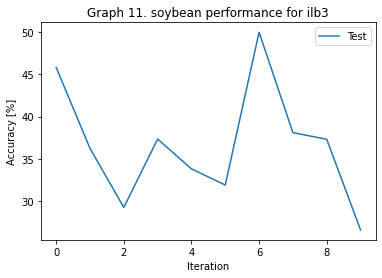

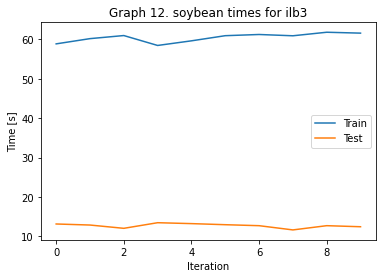

In [264]:
PATH = './*.csv'
# credit-a IBL1 PERFORMANCE
gf_model = 'ilb3'
gf_filename = 'soybean'
credit_ibl1_perf = get_file(PATH=PATH, name=gf_filename,metric='performance',model=gf_model)

# credit-a IBL1 TIME
credit_ibl1_time = get_file(PATH=PATH, name=gf_filename,metric='times',model=gf_model)


In [240]:
print(credit_ibl1_perf)

1


In [135]:
avgs = credit_ibl1_perf.mean(axis=0).values
avgs

array([60.74025974, 57.55314337, 55.32338308, 56.3372859 , 55.3030303 ,
       54.47443182, 53.94471154, 55.61771562, 55.15829941])

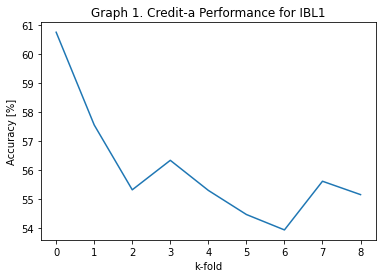

In [138]:
rngs = credit_ibl1_perf.shape[0]
plt.plot(avgs);
plt.xlabel('k-fold');
plt.ylabel('Accuracy [%]')
plt.title('Graph 1. Credit-a Performance for IBL1')
plt.show()